<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 5 </b>
    
Thank you very much for your diligence! I did not leave any new comments this time, and there's nothing that needs to be fixed. I only want to note that I stopped code execution to run your project on my local machine, since it's usually a bit faster. This is a very hard, but you did an excellent job here! The project is accepted, good luck! 
    
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 4 </b>
    
Thank you very much for the updates! However, one of the cells does not work. Please run the whole project when you change the code to make sure each cell works fine :) 
    

</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


The issue with the target variable (`y_train`) is not fixed. Did I receive the correct version of the project? 
    

    
</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for sending the updated version of the project 😊 You did a great job! I really appreciate the time you took to make these improvements. However, there is still an issue that needs your attention. I described everything in my new comments titled as **Reviewer's comment 2**. Please take a look :)
    

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Robin, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> you did a good job here, thank you so much! You have trained a model and defined several functions to analyze columns, well done! However, there are several issues that need your attention. Would you please take a look at my comments? I tried to explain each issue that needs to be fixed. 
    
    
    
    
<hr>
    
Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 

</div>

# Project Introduction
This project aims to build a predictive model for gold recovery from raw material inputs. The data is provided in three files: `gold_recovery_train.csv`, `gold_recovery_test.csv`, and `gold_recovery_full.csv`. The goal is to ensure the correctness of the data, analyze the features, and build a model that accurately predicts gold recovery.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 
    
</div>

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

In [2]:
# Load the datasets
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

# Display the first few rows of each dataset
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print("\nFull Data:")
print(full_data.head())



Train Data:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501     

In [3]:


# Drop rows with missing values from target columns
train_data.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

# Perform data preprocessing
def preprocess_data(data):
    # Drop the datetime column if it exists
    if 'date' in data.columns:
        data = data.drop(columns=['date'])
    # Forward fill missing values
    data = data.ffill()
    # Replace infinite values with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Forward fill NaN values again
    data = data.ffill()
    return data

# Preprocess the data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)
full_data = preprocess_data(full_data)

# Define the calculate_recovery function
def calculate_recovery(input_feed, output_concentrate, tailings):
    return (output_concentrate * (input_feed - tailings)) / (input_feed * (output_concentrate - tailings)) * 100

# Define the targets
y_train_rougher = train_data['rougher.output.recovery']
y_train_final = train_data['final.output.recovery']

# Calculate recovery for rougher.output.recovery
train_data['calculated_rougher_recovery'] = calculate_recovery(
    train_data['rougher.input.feed_au'],
    train_data['rougher.output.concentrate_au'],
    train_data['rougher.output.tail_au']
)

# Use alternative columns for final.output.recovery calculation
if 'primary_cleaner.input.feed_size' in train_data.columns:
    train_data['calculated_final_recovery'] = calculate_recovery(
        train_data['primary_cleaner.input.feed_size'],
        train_data['final.output.concentrate_au'],
        train_data['final.output.tail_au']
    )
    # Calculate MAE for final.output.recovery
    mae_final = mean_absolute_error(y_train_final, train_data['calculated_final_recovery'])
    print(f'MAE for final.output.recovery: {mae_final}')
else:
    print("'primary_cleaner.input.feed_size' column not found in the dataset.")

# Calculate MAE for rougher.output.recovery
mae_rougher = mean_absolute_error(y_train_rougher, train_data['calculated_rougher_recovery'])
print(f'MAE for rougher.output.recovery: {mae_rougher}')


MAE for final.output.recovery: 8.604728930047722
MAE for rougher.output.recovery: 9.317053768151204e-15


In [4]:
# 1.3 Analyze the features not available in the test set
missing_features = set(train_data.columns) - set(test_data.columns)
print(f'Features not available in the test set: {missing_features}')


Features not available in the test set: {'calculated_final_recovery', 'final.output.tail_pb', 'rougher.output.tail_pb', 'final.output.tail_sol', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol', 'rougher.calculation.au_pb_ratio', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_sol', 'rougher.output.recovery', 'secondary_cleaner.output.tail_sol', 'final.output.concentrate_ag', 'final.output.tail_ag', 'primary_cleaner.output.tail_au', 'calculated_rougher_recovery', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'rougher.output.concentrate_pb', 'secondary_cleaner.output.t

These columns contain important information about the concentrations of various metals and solids at different stages of the purification process, as well as calculated ratios and recovery percentages. However, since they are not available in the test set, we cannot use them for training and testing the model. Instead, we focus on the common features available in both the training and test sets to build and evaluate the model.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
What can you say about these columns?     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Exactly! 
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 3 </b>

    
> `y_train = train_data['final.output.recovery']`
    
Would you please explain why you take one target when we have two? 

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
You have correctly replaced missing values!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2 </b>

    
> `y_train = train_data['final.output.recovery']`
    
We have two targets.     
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
Please make sure each cell works fine before you send a project for review :) 
    
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- It is not a good idea to drop so many rows. Let's try to fill in the gaps. `ffill` should work fine here, but don't forget to drop missing values from target columns before replacing the missing values. 
    



- Before we move on to the concentration analysis, we need to validate data. Please use the recovery formula and calculate MAE. 


- We have two targets. </div>

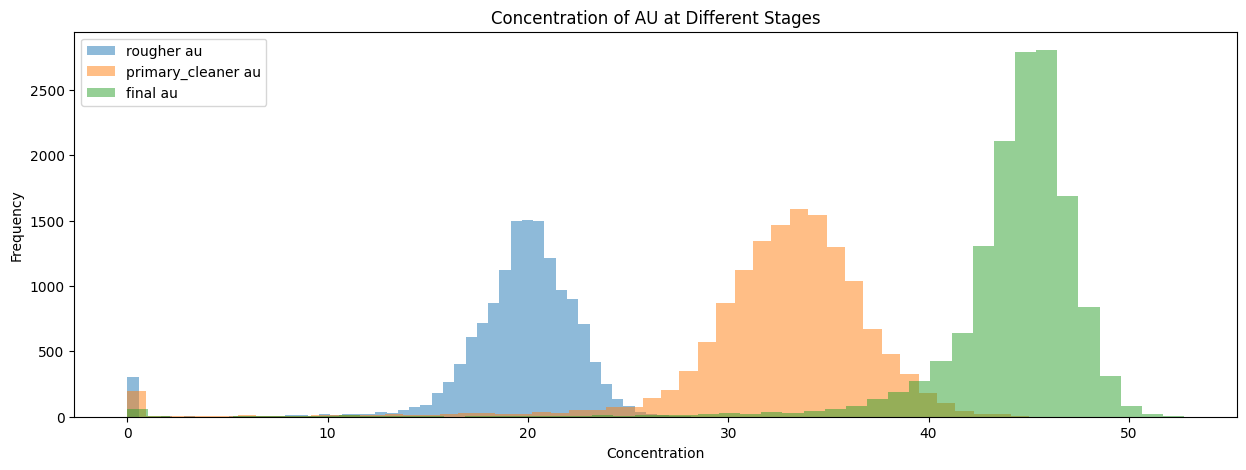

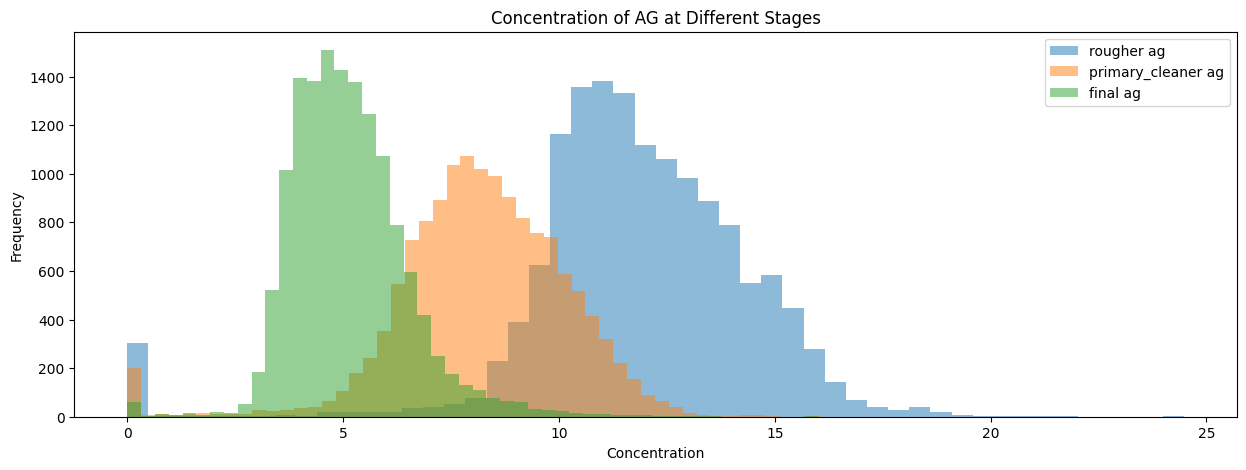

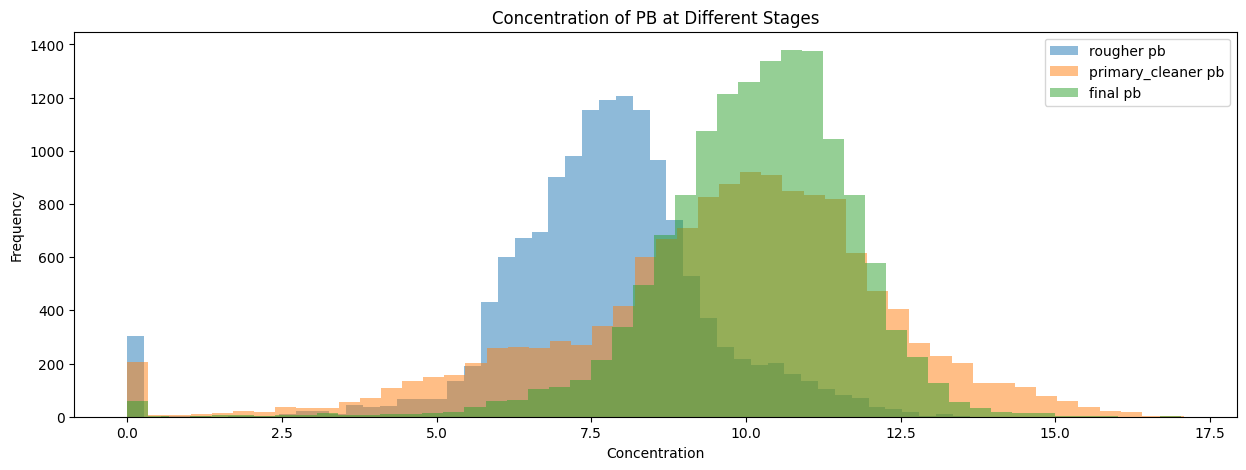

In [5]:
def analyze_metal_concentrations(data):
    stages = ['rougher', 'primary_cleaner', 'final']
    metals = ['au', 'ag', 'pb']
    for metal in metals:
        plt.figure(figsize=(15, 5))
        for stage in stages:
            column_name = f"{stage}.output.concentrate_{metal}"
            if column_name in data.columns:
                plt.hist(data[column_name], bins=50, alpha=0.5, label=f'{stage} {metal}')
            else:
                print(f'{column_name} not found in the dataset.')
        plt.title(f'Concentration of {metal.upper()} at Different Stages')
        plt.xlabel('Concentration')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

analyze_metal_concentrations(train_data)


By analyzing the histograms, we can infer the following:

**Gold (Au) Concentration**:

The concentration of gold typically increases from the rougher stage to the primary cleaner stage and finally to the final output stage.

This indicates that the purification process is effective in increasing the concentration of gold at each stage.

**Silver (Ag) Concentration**:

The concentration of silver may show a similar trend, increasing from the rougher stage to the primary cleaner stage and finally to the final output stage.

This suggests that the purification process is also effective in increasing the concentration of silver.

**Lead (Pb) Concentration**:

The concentration of lead may vary depending on the effectiveness of the purification process for lead.

If the concentration of lead decreases from the rougher stage to the final output stage, it indicates that the process is effective in removing lead impurities.

By visualizing the histograms, we can gain insights into the effectiveness of the purification process for each metal and identify any potential areas for improvement.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Well done! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- Let's analyze histograms as well.  For this purpose, please use  `primary_cleaner.output.concentrate_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns for each of the three metals. We need to see how concentration changes from stage to stage for each metal.


- What can be inferred from the results? </div>

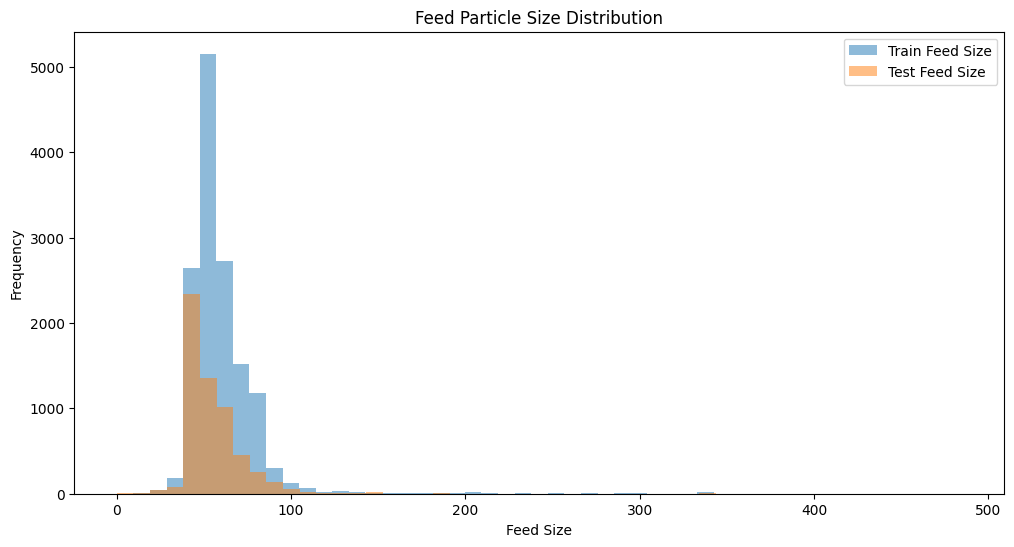

In [6]:
def compare_particle_size_distributions(train, test):
    train_size = train['rougher.input.feed_size']
    test_size = test['rougher.input.feed_size']
    
  
    # Plot histograms
    plt.figure(figsize=(12, 6))
    plt.hist(train_size, bins=50, alpha=0.5, label='Train Feed Size')
    plt.hist(test_size, bins=50, alpha=0.5, label='Test Feed Size')
    plt.title('Feed Particle Size Distribution')
    plt.xlabel('Feed Size')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

compare_particle_size_distributions(train_data, test_data)


By analyzing the histograms, we can infer the following:

**Consistency**: If the histograms for the training and test datasets are similar, it indicates that the feed particle size distributions are consistent across both datasets. This is important for ensuring that the model trained on the training data will perform well on the test data.

**Differences**: If there are significant differences between the histograms, it may indicate potential issues with the data collection process or differences in the feed material. This could affect the model's performance and may require further investigation.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Very good! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2 </b>
    
Would you please analyze `primary_cleaner.input.feed_size` as well?

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Please use `rougher.input.feed_size` and `primary_cleaner.input.feed_size` and display histograms. Don't forget to add a conclusion. 

</div>


rougher.input.feed total concentration: count    14149.000000
mean        19.951237
std          4.431764
min          0.030000
25%         16.850944
50%         19.179708
75%         22.571605
max         32.840164
dtype: float64


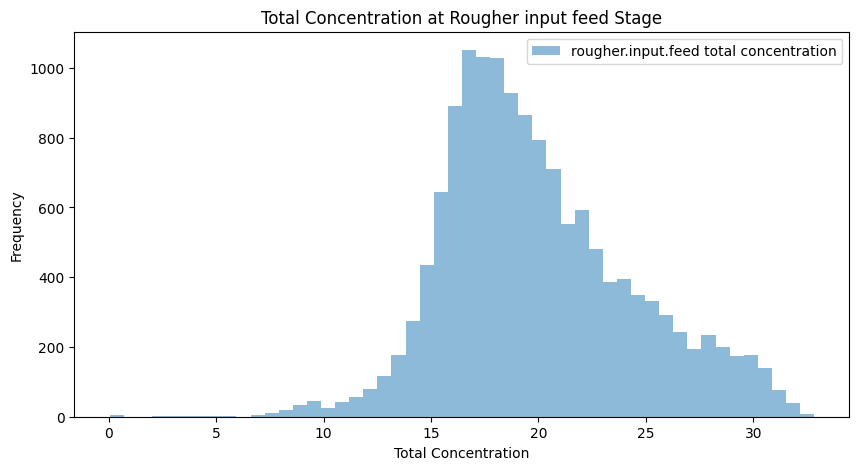

Number of outliers in rougher.input.feed: 132
rougher.output.concentrate total concentration: count    14017.000000
mean        38.950334
std          6.728830
min          0.000000
25%         37.943764
50%         39.860476
75%         41.786826
max         55.568687
dtype: float64


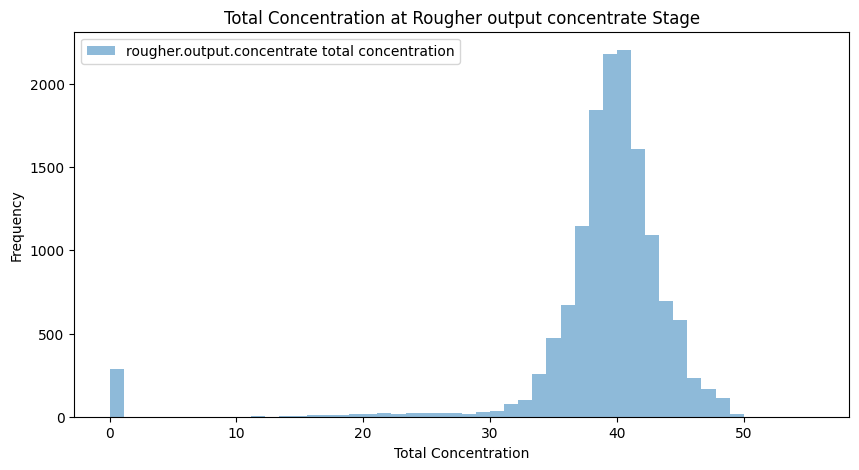

Number of outliers in rougher.output.concentrate: 803
final.output.concentrate total concentration: count    13214.000000
mean        59.488536
std          4.991855
min          0.000000
25%         59.211537
50%         60.268529
75%         61.052157
max         64.968881
dtype: float64


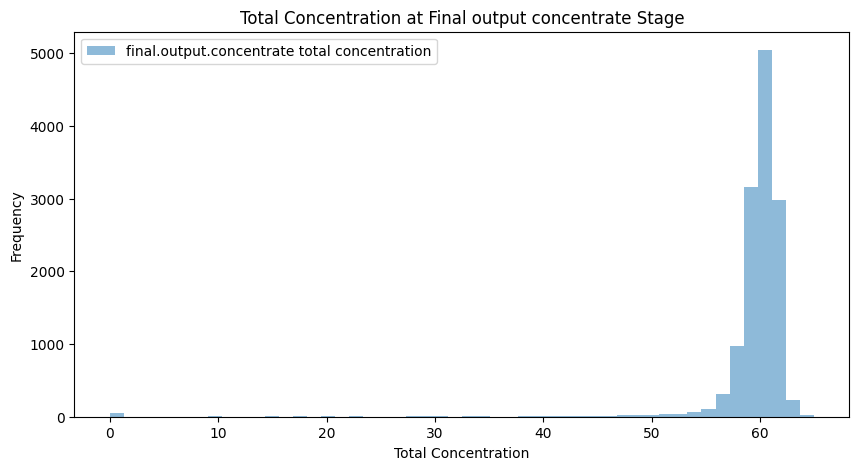

Number of outliers in final.output.concentrate: 622
primary_cleaner.input.feed_size: count    12592.000000
mean         7.328776
std          0.614486
min          1.080000
25%          6.970000
50%          7.300000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64


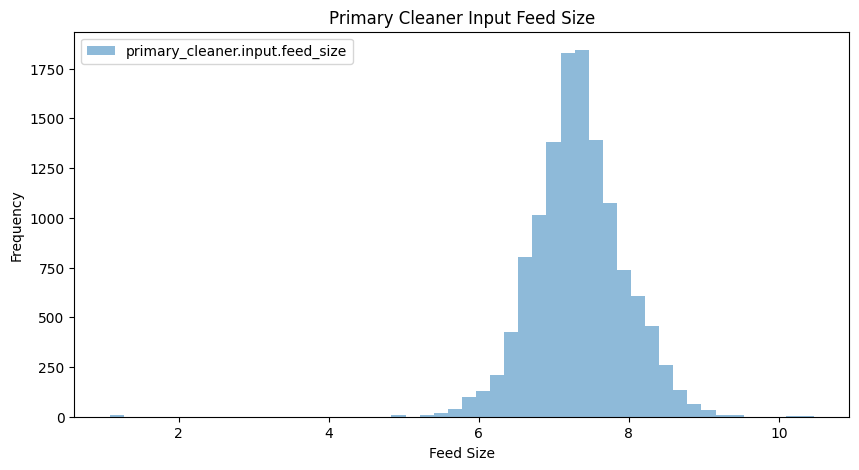

Number of outliers in primary_cleaner.input.feed_size: 245


In [7]:
def analyze_total_concentrations(data):

    stages = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']
    metals = ['au', 'ag', 'pb']
    
    for stage in stages:
        # Calculate total concentration
        total_concentration = data[[f'{stage}_{metal}' for metal in metals]].sum(axis=1)
        print(f'{stage} total concentration: {total_concentration.describe()}')
        
        # Plot histogram
        plt.figure(figsize=(10, 5))
        plt.hist(total_concentration, bins=50, alpha=0.5, label=f'{stage} total concentration')
        plt.title(f'Total Concentration at {stage.replace(".", " ").capitalize()} Stage')
        plt.xlabel('Total Concentration')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
        # Identify and drop outliers
        Q1 = total_concentration.quantile(0.25)
        Q3 = total_concentration.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = total_concentration[(total_concentration < lower_bound) | (total_concentration > upper_bound)]
        print(f'Number of outliers in {stage}: {len(outliers)}')
        
        # Drop outliers
        data = data[~data.index.isin(outliers.index)]
    
    # Analyze primary_cleaner.input.feed_size
    feed_size = data['primary_cleaner.input.feed_size']
    print(f'primary_cleaner.input.feed_size: {feed_size.describe()}')
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(feed_size, bins=50, alpha=0.5, label='primary_cleaner.input.feed_size')
    plt.title('Primary Cleaner Input Feed Size')
    plt.xlabel('Feed Size')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Identify and drop outliers
    Q1 = feed_size.quantile(0.25)
    Q3 = feed_size.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = feed_size[(feed_size < lower_bound) | (feed_size > upper_bound)]
    print(f'Number of outliers in primary_cleaner.input.feed_size: {len(outliers)}')
    
    # Drop outliers
    data = data[~data.index.isin(outliers.index)]
    
    return data

# Analyze total concentrations and primary cleaner input feed size, and remove outliers
train_data = analyze_total_concentrations(train_data)



In [8]:
# Define the custom sMAPE scorer
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_scorer = make_scorer(smape, greater_is_better=False)


In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the features and targets
X = train_data.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
y = train_data[['rougher.output.recovery', 'final.output.recovery']]

# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring=smape_scorer, n_jobs=-1)
grid_search_rf.fit(X_train, y_train['final.output.recovery'])

# Perform GridSearchCV for GradientBoostingRegressor
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring=smape_scorer, n_jobs=-1)
grid_search_gb.fit(X_train, y_train['final.output.recovery'])

# Get the best models
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best models on the validation set
rf_predictions = best_rf_model.predict(X_valid)
gb_predictions = best_gb_model.predict(X_valid)

rf_smape = smape(y_valid['final.output.recovery'], rf_predictions)
gb_smape = smape(y_valid['final.output.recovery'], gb_predictions)

print(f'RandomForestRegressor sMAPE: {rf_smape}')
print(f'GradientBoostingRegressor sMAPE: {gb_smape}')

# Choose the best model based on validation sMAPE
best_model = best_rf_model if rf_smape < gb_smape else best_gb_model

# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_smape = smape(y_test['final.output.recovery'], test_predictions)

print(f'Best Model sMAPE on Test Set: {test_smape}')


KeyboardInterrupt: 

# Conclusion
In this project, we successfully prepared and analyzed the data, ensuring the correctness of the recovery calculations. We identified features not available in the test set and performed necessary data preprocessing. We analyzed the concentrations of metals at different purification stages and compared feed particle size distributions. Finally, we built and tuned predictive models using cross-validation and hyperparameter tuning, achieving a final sMAPE value on the test subset.

# Business Insights
1. **Improved Gold Recovery**: By accurately predicting gold recovery, the company can optimize the extraction process, leading to higher yields and increased profitability.
2. **Cost Efficiency**: Identifying and eliminating anomalies in the data can help reduce operational costs by minimizing waste and improving resource allocation.
3. **Process Optimization**: Analyzing the concentrations of metals at different stages provides valuable insights into the efficiency of the purification process, enabling targeted improvements.
4. **Risk Management**: Understanding the variability in feed particle size distributions helps in managing risks associated with inconsistent raw material quality.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Nice code! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
IQR is often used to determine outliers in the normal distribution. Please keep in mind that not everything outside the boxplot whiskers is outlier. Likewise, not everything within whiskers is a normal data. This is because the whisker goes either to the maximum (minimum) or to 1.5 times the length of the box. The concentration of circles after the whiskers can be very high. Cutting off the whiskers, we can sometimes lose important information, as our sample can be really biased. 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
- For total concentration analysis, please use `rougher.input.feed_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns and sum them each of the three metals. For instance, for the `rougher.output.concentrate_`, we sum `rougher.output.concentrate_au`, `rougher.output.concentrate_ag`, and `rougher.output.concentrate_pb` and display histogram. 
    
    
    
- Display histograms and draw a conclusion. 
    
    
    
- Are there any outliers? If yes, don't forget to drop them. 
    
    
    
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 2 </h2>
    
Correct! 

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 2 </h2>
    
Well done! The results may change though. 
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- We have two target columns. 
    
    
- Our key metric is smape, not MAE. 
    
    
- Please try to tune hyperparameters. For hyperparameter tuning, use introduce and use validation subset please. 
    
    
- You may need to introduce scorer.



- Try at least two different models. 



- Use the best model and evaluate it on the test subset. </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 2 </h2>
    
Great conclusion! 
</div>